In [93]:
#IMPORT PACKAGES
from rdflib import Graph, URIRef
import os.path
import importlib
from pathlib import Path
import numpy as np
import xml.etree.ElementTree as ET
import open3d as o3d
import uuid    
import pye57 
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.util
from ifcopenshell.util.selector import Selector
import multiprocessing
import random as rd
import pandas as pd
# from tabulate import tabulate
import cv2
import laspy
import math
from sklearn.neighbors import NearestNeighbors
from shapely.geometry import LineString
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from shapely.geometry import Point, LineString, Polygon
import json
from functools import cmp_to_key
from sympy import Point, Line, intersection
from collections import defaultdict
import random
from shapely.geometry import MultiPoint
from shapely.ops import nearest_points
import networkx as nx
from itertools import permutations
import glob
import re

import matplotlib.pyplot as plt

import geomapi
from geomapi.nodes import *
import geomapi.utils as ut
from geomapi.utils import geometryutils as gmu
import geomapi.tools as tl


import sys
module_path = r"C:/Users/u0138247/Scan-to-BIM-CVPR-2024"
# if module_path not in sys.path:
#     sys.path.append(module_path)

# Now you can import the module
import utils

# Verify the import
print(utils)
import utils.t1_utils as t1


module_path = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-MB"

import utils

# Verify the import
print(utils)
import utils.t6_utils as t6


<module 'utils' from 'C:\\Users/u0138247/Scan-to-BIM-CVPR-2024\\utils\\__init__.py'>
<module 'utils' from 'C:\\Users/u0138247/Scan-to-BIM-CVPR-2024\\utils\\__init__.py'>


In [2]:
folder_path = r'C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\data\t0\2D\train\json_train'
txt_files = [file for file in os.listdir(folder_path) if file.endswith('.txt')]

print(txt_files)

['01_OfficeLab_01_F1_floorplan.txt', '04_Library_01_F1_floorplan.txt', '04_Library_01_F2_floorplan.txt', '05_MedOffice_01_B1_floorplan.txt', '05_MedOffice_01_F1_floorplan.txt', '05_MedOffice_01_F2_floorplan.txt', '05_MedOffice_01_F3_floorplan.txt', '06_MedOffice_02_B1_floorplan.txt', '06_MedOffice_02_F1_floorplan.txt', '06_MedOffice_02_F2_floorplan.txt', '06_MedOffice_02_F3_floorplan.txt', '09_MedOffice_04_F1_floorplan.txt', '09_MedOffice_04_F2_floorplan.txt', '09_MedOffice_04_F3_floorplan.txt', '09_MedOffice_04_F4_floorplan.txt', '09_MedOffice_04_F5_floorplan.txt', '12_SmallBuilding_02_F1_floorplan.txt', '12_SmallBuilding_02_F2_floorplan.txt', '15_ShortOffice_03_B1_floorplan.txt', '15_ShortOffice_03_F1_floorplan.txt', '15_ShortOffice_03_F2_floorplan.txt', '16_Facility_01_F1_floorplan.txt', '19_MedOffice_07_B1_floorplan.txt', '19_MedOffice_07_F1_floorplan.txt', '19_MedOffice_07_F2_floorplan.txt', '19_MedOffice_07_F3_floorplan.txt', '19_MedOffice_07_F4_floorplan.txt', '20_MedOffice_08_B

In [3]:
txt_file = [file for file in txt_files if '05_MedOffice_01_F2' in file and file.endswith('.txt')]
if txt_file:
    txt_file = txt_file[0]
    print(txt_file)
else:
    print("TWT file not found.")

05_MedOffice_01_F2_floorplan.txt


In [4]:

folder_path = r'C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\data\t0\2D\train\json_train'
txt_file_path = os.path.join(folder_path, '05_MedOffice_01_F2_floorplan.txt')

with open(txt_file_path, 'r') as file:
    content = file.read()



In [5]:

layer_names = []
data = json.loads(content)

for key in data.keys():
    if key.startswith("layer"):
        layer_names.append(data[key]["layer name"])

wall_layer_names = [name for name in layer_names if 'wall' in name.lower()]
points = []
for key, value in data.items():
    if key.startswith("layer"):
        points.extend(value.get("points", []))


In [6]:
import open3d as o3d

linesets = []

for element_points in points:
    # Extract x and y coordinates from the points
    x_coords = element_points['coordinates'][::2]
    y_coords = element_points['coordinates'][1::2]
    
    # Create a line set from the coordinates
    lines = []
    for i in range(len(x_coords) - 1):
        line = [i, i + 1]
        lines.append(line)
    
    # Create a line set object
    lineset = o3d.geometry.LineSet()
    lineset.points = o3d.utility.Vector3dVector(list(zip(x_coords, y_coords, [0]*len(x_coords))))
    lineset.lines = o3d.utility.Vector2iVector(lines)
    
    # Append the line set to the list
    linesets.append(lineset)

In [7]:
print((linesets))

[LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 2 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet with 1 lines., LineSet wi

In [ ]:
wallNodesBIM=linesets

In [94]:
# Create a bounding box that covers all geometries
min_bound = np.min([lineset.get_min_bound() for lineset in linesets], axis=0)
max_bound = np.max([lineset.get_max_bound() for lineset in linesets], axis=0)
bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound, max_bound)

# Add the bounding box to the list of geometries to draw
geometries = linesets + [bbox]

# Draw the geometries
o3d.visualization.draw_geometries(geometries)

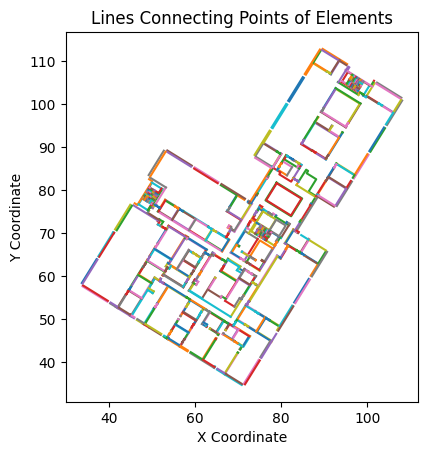

In [9]:
for element_points in points:
    # Extract x and y coordinates from the points
    x_coords = element_points['coordinates'][::2]
    y_coords = element_points['coordinates'][1::2]

    # Plot the lines connecting the points
    plt.plot(x_coords, y_coords)

# Add labels and title to the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Lines Connecting Points of Elements')

# Set the aspect ratio to 'equal'
plt.gca().set_aspect('equal')

# Display the plot
plt.show()

In [10]:
#paths
path = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge"
path= Path(path) 
input_folder_t4=path/'data'/'t4'/'test'
input_folder_t6=path/'data'/'t6'/'test'
class_file=path/'data'/'_classes.json'
output_folder=path/'data'/'t8'/ 'test'
os.makedirs(output_folder, exist_ok=True)

In [11]:
print(class_file)

C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\data\_classes.json


In [12]:
# Read the JSON file
with open(class_file, 'r') as file:
    json_data = json.load(file)
# Create a dictionary
class_dict = {
    'classes': json_data['classes'],
    'default': json_data['default'],
    'type': json_data['type'],
    'format': json_data['format'],
    'created_with': json_data['created_with']
}
print(class_dict)

{'classes': [{'name': 'unassigned', 'id': 255, 'temp_id': 0, 'color': '#9da2ab'}, {'name': 'floors', 'id': 0, 'temp_id': 1, 'color': '#03c2fc'}, {'name': 'ceilings', 'id': 1, 'temp_id': 2, 'color': '#e81416'}, {'name': 'walls', 'id': 2, 'temp_id': 3, 'color': '#ffa500'}, {'name': 'columns', 'id': 3, 'temp_id': 4, 'color': '#faeb36'}, {'name': 'doors', 'id': 4, 'temp_id': 5, 'color': '#79c314'}, {'name': 'beams', 'id': 5, 'temp_id': 6, 'color': '#79c314'}], 'default': 255, 'type': 'semantic_segmentation', 'format': 'kitti', 'created_with': {'name': 'Saiga', 'version': '1.0.1'}}


In [13]:
# Define the two transformation matrices
A = np.array([[0.847, 0.532, 0.00, 65.443],
              [-0.532, 0.847, -0.001, 69.782],
              [-0.001, 0.000, 1.000, 12.491],
              [0.00, 0.00, 0.00, 1.00]])

B = np.array([[1.00, -0.003, -0.00, 0.067],
              [0.003, 1.00, 0.00, 0.035],
              [0.00, -0.00, 1.00, 0.02],
              [0.00, 0.00, 0.00, 1.00]])

C = np.array([[1.00, 0.00, 0.00, -0.004],
              [0.00, 1.00, -0.00, 0.005],
              [0.00, 0.00, 1.00, 0.00],
              [0.00, 0.00, 0.00, 1.00]])

# Multiply the two matrices
transform_matrix = np.dot(A, B)
transform_matrix = np.dot(transform_matrix, C)

In [14]:
print(transform_matrix)

[[ 8.48596000e-01  5.29459000e-01  0.00000000e+00  6.55176219e+01]
 [-5.29459000e-01  8.48596000e-01 -1.00000000e-03  6.97823418e+01]
 [-1.00000000e-03  3.00000000e-06  1.00000000e+00  1.25109370e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [15]:
f=r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\data\t4\train\05_MedOffice_01_F2_small1.laz"
pcdNodes=[]
# check if las/pcd variable is already defined
print(f'processing {ut.get_filename(f)}...')
las = laspy.read(f) if 'las' not in globals() else las
# for i in las['classes']:
#     if i not in [255, 2]:
#         print(i)
pcd=gmu.las_to_pcd(las,transform=transform_matrix,getNormals=True) if 'pcd' not in globals() else pcd # this is the slowest step
#seperate initial objects
for c in class_dict['classes']:
    if c['id'] in [0,1,2,3,4,255]:
        idx=np.where((las['classes']==c['id']))[0]
        class_pcd=pcd.select_by_index(idx)
        object_labels=las['objects'][idx]
        for j in np.unique(object_labels):
            indices=np.where(object_labels==j)[0]
            object_pcd=class_pcd.select_by_index(indices)
            pcdNodes.append(PointCloudNode(resource=object_pcd,
                                        class_id=c['id'],
                                        object_id=j,
                                        color=ut.random_color(),
                                        name=c['name']+f'_{str(j)}'))
        #all further processing will be placed here (or in functions)!
        # print( c['name'], f': {len(pcdNodes)} Nodes found')

processing 05_MedOffice_01_F2_small1...


In [16]:
o3d.visualization.draw_geometries([pcd])

In [17]:
print(len(pcdNodes))

289


In [18]:
clutterPCDNodes=[n for n in pcdNodes if 'unassigned' in n.name and type(n)==PointCloudNode]
floorPCDNodes=[n for n in pcdNodes if 'floors' in n.name and type(n)==PointCloudNode]
ceilingPCDNodes=[n for n in pcdNodes if 'ceilings' in n.name and type(n)==PointCloudNode]
wallPCDNodes=[n for n in pcdNodes if 'walls' in n.name and type(n)==PointCloudNode]
columnPCDNodes=[n for n in pcdNodes if 'columns' in n.name and type(n)==PointCloudNode]
doorPCDNodes=[n for n in pcdNodes if 'doors' in n.name and type(n)==PointCloudNode]
windowPCDNodes=[n for n in pcdNodes if 'windows' in n.name and type(n)==PointCloudNode]
print(f'{len(clutterPCDNodes)} clutterNodes detected!')
print(f'{len(floorPCDNodes)} floorsNodes detected!')
print(f'{len(ceilingPCDNodes)} ceilingsNodes detected!')
print(f'{len(wallPCDNodes)} wallNodes detected!')
print(f'{len(columnPCDNodes)} columnNodes detected!')
print(f'{len(doorPCDNodes)} doorNodes detected!')
print(f'{len(windowPCDNodes)} windowNodes detected!')

1 clutterNodes detected!
1 floorsNodes detected!
1 ceilingsNodes detected!
145 wallNodes detected!
25 columnNodes detected!
116 doorNodes detected!
0 windowNodes detected!


In [19]:
# for n in clutterPCDNodes+floorPCDNodes+ceilingPCDNodes+columnPCDNodes+doorPCDNodes+windowPCDNodes: # this is quite slow because you iterate through 2 scalar fields every time
#     idx=np.where((las['classes']==n.class_id) & (las['objects']==n.object_id))
#     pcd=o3d.geometry.PointCloud()
#     pcd.points=o3d.utility.Vector3dVector(las.xyz[idx])
#     red = las['red'][idx]
#     green = las['green'][idx]
#     blue = las['blue'][idx]
#     #if color is 32 bit, only keep 8 bit color
#     if red.max()>255:
#         red = las['red'][idx] >> 8 & 0xFF
#         green = las['green'][idx] >> 8 & 0xFF
#         blue = las['blue'][idx] >> 8 & 0xFF
#     # if colorspace is [0-255] -> remap to [0-1]
#     if red.max() >1:
#         red=red/255
#         green=green/255
#         blue=blue/255
#     pcd.colors=o3d.utility.Vector3dVector(np.vstack((red,green,blue)).transpose())
#     n.resource=pcd
#     n.get_oriented_bounding_box()
#     n.orientedBoundingBox.color=[1,0,0]

In [20]:
# for n in wallPCDNodes:#+ceilingsNodes+floorsNodes: # this is quite slow because you iterate through 2 scalar fields every time
#     idx=np.where((las['classes']==n.class_id) & (las['objects']==n.object_id))
#     pcd=o3d.geometry.PointCloud()
#     pcd.points=o3d.utility.Vector3dVector(las.xyz[idx])
#     pcd.paint_uniform_color([0.5,0.5,0.5])
#     red = las['red'][idx]
#     green = las['green'][idx]
#     blue = las['blue'][idx]
#     #if color is 32 bit, only keep 8 bit color
#     if red.max()>255:
#         red = las['red'][idx] >> 8 & 0xFF
#         green = las['green'][idx] >> 8 & 0xFF
#         blue = las['blue'][idx] >> 8 & 0xFF
#     # if colorspace is [0-255] -> remap to [0-1]
#     if red.max() >1:
#         red=red/255
#         green=green/255
#         blue=blue/255
#     pcd.colors=o3d.utility.Vector3dVector(np.column_stack((red, green, blue)))
#     n.resource=pcd
#     n.get_oriented_bounding_box()
#     n.orientedBoundingBox.color=[1,0,0]

In [21]:
print(ceilingPCDNodes)

In [22]:
ceilingPCDNodes[0].resource.paint_uniform_color([1,0,0])

PointCloud with 5737921 points.

In [23]:
point_cloud_o3d=ceilingPCDNodes[0].resource

In [24]:
o3d.visualization.draw_geometries([point_cloud_o3d]+geometries)

In [25]:
# Convert the Open3D point cloud to a NumPy array
pointcloud_np = np.asarray(ceilingPCDNodes[0].resource.points)

# Generate the 2D projection of the point cloud onto the x-y plane (nadir view)
nadir_view = pointcloud_np[:, :2]  # Only considering x, y coordinates

# Determine the range of x and y coordinates
x_min, x_max = nadir_view[:, 0].min(), nadir_view[:, 0].max()
y_min, y_max = nadir_view[:, 1].min(), nadir_view[:, 1].max()

In [26]:
# Convert the Open3D point cloud to a NumPy array
points = np.asarray(point_cloud_o3d.points)
colors = np.asarray(point_cloud_o3d.colors)

# # Plot the nadir view image with real colors
# plt.figure(figsize=(8, 6))
# plt.imshow(np.zeros((10, 10)).T, extent=[x_min, x_max, y_min, y_max], origin='lower', cmap='gray')  # Replace np.zeros((10, 10)) with your own data if necessary
# plt.scatter(points[:, 0], points[:, 1], c=colors, s=1)  # Plot points with real colors
# plt.axis('off')  # Turn off axis labels and ticks


# plt.gca().set_position([0, 0, 1, 1])  # Set the plot area to cover the whole figure
# plt.savefig(r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\point_cloud_image.png", bbox_inches='tight', pad_inches=0, dpi=300)  # Save the figure without extra whitespace and set DPI
# plt.close()  # Close the figure to release memory


# # Save axis limits to a file
# with open(r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\axis_limits.txt", "w") as f:
#     f.write(f"x_min: {x_min}\n")
#     f.write(f"x_max: {x_max}\n")
#     f.write(f"y_min: {y_min}\n")
#     f.write(f"y_max: {y_max}\n")

# print("Image saved as point_cloud_image.png")
# print("Axis limits saved as axis_limits.txt")


In [27]:
print(points)

[[ 99.62049722 101.98619942  19.46919313]
 [ 99.63638099 102.0116573   19.46919322]
 [ 99.51881186 101.86100324  19.47921265]
 ...
 [ 44.31644485  68.03489316  15.37795892]
 [ 44.10335386  68.01457371  15.38812852]
 [ 38.01751529  64.04250061  15.36116875]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the sub-images
sub_image_size = 25  # Adjust this value as needed

# Calculate the number of sub-images in the x and y directions
num_sub_images_x = int(np.ceil((x_max - x_min) / sub_image_size))
num_sub_images_y = int(np.ceil((y_max - y_min) / sub_image_size))

# For each sub-image...
for i in range(num_sub_images_x):
    for j in range(num_sub_images_y):
        # Calculate the x and y range of the sub-image
        x_min_sub = x_min + i * sub_image_size
        x_max_sub = min(x_min_sub + sub_image_size, x_max)
        y_min_sub = y_min + j * sub_image_size
        y_max_sub = min(y_min_sub + sub_image_size, y_max)

        # Extract the points that fall within the sub-image
        mask = ((points[:, 0] >= x_min_sub) & (points[:, 0] < x_max_sub) &
                (points[:, 1] >= y_min_sub) & (points[:, 1] < y_max_sub))
        points_sub = points[mask]
        colors_sub = colors[mask]

        # Plot the sub-image
        plt.figure(figsize=(8, 6))
        plt.imshow(np.zeros((10, 10)).T, extent=[x_min_sub, x_max_sub, y_min_sub, y_max_sub], origin='lower', cmap='gray')
        plt.scatter(points_sub[:, 0], points_sub[:, 1], c=colors_sub, s=1)
        plt.axis('off')
        plt.gca().set_position([0, 0, 1, 1])

        # Save the sub-image
        plt.savefig(f"C:\\Users\\u0138247\\OneDrive - KU Leuven\\2024-05 CVPR scan-to-BIM challenge\\code\\Scan-to-BIM-CVPR-2024-HDW\\point_cloud_image_{i}_{j}.png", bbox_inches='tight', pad_inches=0, dpi=300)
        plt.close()

        # Save the axis limits of the sub-image
        with open(f"C:\\Users\\u0138247\\OneDrive - KU Leuven\\2024-05 CVPR scan-to-BIM challenge\\code\\Scan-to-BIM-CVPR-2024-HDW\\axis_limits_{i}_{j}.txt", "w") as f:
            f.write(f"x_min: {x_min_sub}\n")
            f.write(f"x_max: {x_max_sub}\n")
            f.write(f"y_min: {y_min_sub}\n")
            f.write(f"y_max: {y_max_sub}\n")

        print(f"Sub-images saved as point_cloud_image_{i}_{j}.png")
        print(f"Axis limits saved as axis_limits_{i}_{j}.txt")

Sub-images saved as point_cloud_image_0_0.png
Axis limits saved as axis_limits_0_0.txt
Sub-images saved as point_cloud_image_0_1.png
Axis limits saved as axis_limits_0_1.txt
Sub-images saved as point_cloud_image_0_2.png
Axis limits saved as axis_limits_0_2.txt
Sub-images saved as point_cloud_image_0_3.png
Axis limits saved as axis_limits_0_3.txt
Sub-images saved as point_cloud_image_1_0.png
Axis limits saved as axis_limits_1_0.txt
Sub-images saved as point_cloud_image_1_1.png
Axis limits saved as axis_limits_1_1.txt
Sub-images saved as point_cloud_image_1_2.png
Axis limits saved as axis_limits_1_2.txt
Sub-images saved as point_cloud_image_1_3.png
Axis limits saved as axis_limits_1_3.txt
Sub-images saved as point_cloud_image_2_0.png
Axis limits saved as axis_limits_2_0.txt
Sub-images saved as point_cloud_image_2_1.png
Axis limits saved as axis_limits_2_1.txt
Sub-images saved as point_cloud_image_2_2.png
Axis limits saved as axis_limits_2_2.txt
Sub-images saved as point_cloud_image_2_3.p

In [29]:
# geometries=[]
# for wallNode in wallPCDNodes:
#     geometries.append(wallNode.resource)

# o3d.visualization.draw_geometries(geometries)

try to do with one then go with all

In [30]:
# Get the current directory
current_dir = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW"

# List all the files in the directory
files = os.listdir(current_dir)

png_files = [file for file in files if file.endswith(".png") and "point_cloud_image" in file]

# # Filter the files to only include .png files
# png_files = [file for file in files if file.endswith(".png")]
# Create an ImageNode for each .png file
image_nodes = []

for png_file in png_files:
    image_node = ImageNode(path=os.path.join(current_dir, png_file))
    image_nodes.append(image_node)

In [31]:
txt_files = glob.glob(f"{current_dir}/*axis_limits*.txt")


for i,txt_file in enumerate(txt_files):
    # Read the content of the txt file
    with open(txt_file, 'r') as file:
        content = file.read()
    # Extract the values from the content using regular expressions
    x_min = re.findall(r'x_min: ([-+]?\d*\.\d+|\d+)', content)
    x_max = re.findall(r'x_max: ([-+]?\d*\.\d+|\d+)', content)
    y_min = re.findall(r'y_min: ([-+]?\d*\.\d+|\d+)', content)
    y_max = re.findall(r'y_max: ([-+]?\d*\.\d+|\d+)', content)
    # print(x_min, x_max, y_min, y_max)
    for i in range(len(image_nodes)):
        if  txt_file.split("\\")[-1].replace("axis_limits_", "").replace(".txt", "") in image_nodes[i].name :
            image_nodes[i].x_min = float(x_min[0]) if x_min else None
            image_nodes[i].x_max = float(x_max[0]) if x_max else None
            image_nodes[i].y_min = float(y_min[0]) if y_min else None
            image_nodes[i].y_max = float(y_max[0]) if y_max else None


In [32]:
for image_node in image_nodes:
    string = image_node.name
    result = string.split("_")[-2:]
    result = "_".join(result)
    graphPath = f"C:\\Users\\u0138247\\OneDrive - KU Leuven\\2024-05 CVPR scan-to-BIM challenge\\code\\Scan-to-BIM-CVPR-2024-HDW\\Image_node_graph_{result}.ttl"
    # print(graphPath)
    image_node.to_graph(graphPath,save=True)



In [33]:
for png_file in png_files:
    full_path = os.path.join(current_dir, png_file)
    image = cv2.imread(full_path)
    height, width, channels = image.shape
    for i in range(len(image_nodes)):
        if  png_file.split("\\")[-1].replace("point_cloud_image_", "").replace(".png", "") in image_nodes[i].name :
            image_nodes[i].height = height
            image_nodes[i].width = width
    # print(height, width, channels)

In [34]:
for image_node in image_nodes:
    image_node.real_width = image_node.x_max-image_node.x_min
    image_node.gsd_x=image_node.real_width/image_node.width
    image_node.real_height = image_node.y_max-image_node.y_min
    image_node.gsd_y=image_node.real_height/image_node.height



In [35]:
def initiate_hed():
    """Initializes the Holistically-Nested Edge Detection (HED) model.

    This function initializes the HED model for edge detection using the provided pretrained weights and prototxt file.

    Returns:
        tuple:  the HED model.
    """
    proto_path = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\hed\examples\hed\deploy.prototxt"
    model_path = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\hed\examples\hed\hed_pretrained_bsds.caffemodel"
    hed_net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

    class CropLayer(object):
        def __init__(self, params, blobs):
            self.startX = 0
            self.startY = 0
            self.endX = 0
            self.endY = 0

        def getMemoryShapes(self, inputs):
            (inputShape, targetShape) = (inputs[0], inputs[1])
            (batchSize, numChannels) = (inputShape[0], inputShape[1])
            (H, W) = (targetShape[2], targetShape[3])

            self.startX = int((inputShape[3] - targetShape[3]) / 2)
            self.startY = int((inputShape[2] - targetShape[2]) / 2)
            self.endX = self.startX + W
            self.endY = self.startY + H

            return [[batchSize, numChannels, H, W]]

        def forward(self, inputs):
            return [inputs[0][:, :, self.startY:self.endY,
                    self.startX:self.endX]]

    cv2.dnn_registerLayer("Crop", CropLayer)

    return  hed_net

In [36]:
net = initiate_hed()

In [37]:
def create_HED(img_cv,number):
    """Create Holistically-Nested Edge Detection (HED) images and masked HED images.

    This function takes a list of images (`img_nodes`), an HED network (`net`), and information about additional lines
    (beginning and ending points) in homogeneous coordinates. It processes the images with the HED model to create edge
    maps and saves both the HED images and masked HED images to the output directory.

    Args:
        img_nodes (list): A list of image nodes containing information about images.
        output (str): The path to the output directory where HED images will be saved.
        net: The initialized HED network.
        hom_begin_points_ad (list): A list of lists containing the homogeneous coordinates of beginning points of additional lines.
        hom_end_points_ad (list): A list of lists containing the homogeneous coordinates of ending points of additional lines.

    Returns:
        None
    """
    # print(img_cv)
    output_dir = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW"
    im = cv2.imread(img_cv)
    H, W = im.shape[0:2]
    # print(H, W)
    blob = cv2.dnn.blobFromImage(im, scalefactor=1, size=(W, H),
                                    mean=(100, 180, 100),
                                    swapRB=False, crop=False)
    # print(blob.shape)   
    net.setInput(blob)
    hed = net.forward()
    hed = hed[0, 0, :, :]
    threshold = 0.65
    hed = (hed > threshold) * 255
    hed = hed.astype("uint8")
    # print(hed.shape)
    
    output_image_name = os.path.join(output_dir, f"image_HED_{number}.jpg")
    # print(output_image_name)
    
    cv2.imwrite(output_image_name, hed)

In [38]:
for png_file in png_files:
    full_path = os.path.join(current_dir, png_file)
    string = png_file
    result = string.split("_")[-2:]
    number = "_".join(result)
    number = number.replace(".png", "")
    create_HED(full_path,number)


In [39]:
def detect_ab_lines(image,number):
    """Detect and save additional lines (ablines) in images.

    This function takes a list of images (`img_nodes`), paths to masked HED images, and information about additional
    lines (beginning and ending points) in homogeneous coordinates. It detects additional lines in the images using
    edge detection and Hough line transform, then saves the images with detected lines to the output directory.

    Args:
        output (str): The path to the output directory where images with ablines will be saved.
        hom_begin_points_ad (list): A list of lists containing the homogeneous coordinates of beginning points of additional lines.
        hom_end_points_ad (list): A list of lists containing the homogeneous coordinates of ending points of additional lines.
        img_nodes (list): A list of image nodes containing information about images and ablines.

    Returns:
        list: A list of image nodes with detected ablines.
    """
    # image= r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_ceiling.jpg"
    img = cv2.imread(image, cv2.IMREAD_ANYCOLOR)
    _, binarized_edges = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    skeleton = cv2.ximgproc.thinning(binarized_edges)
    skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)
    # # Convert the image to grayscale
    # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # # Apply thinning operation on the grayscale image
    # skeleton = cv2.ximgproc.thinning(gray_img)

    # # Convert the skeleton image back to RGB
    # skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

    edges = cv2.GaussianBlur(skeleton, (5, 5), 0)
    edges = cv2.Canny(edges, 0.5, 1, apertureSize=3)

    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=150, maxLineGap=30)

    ablineset = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            line2 = ((x1, y1), (x2, y2))
            ablineset.append(line2)
            cv2.line(skeleton_rgb, (x1, y1), (x2, y2), (255, 0, 0), thickness=1)

    output_image_name = os.path.join(r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW", f"image_ab_lines{number}.jpg")
    cv2.imwrite(output_image_name, skeleton_rgb)

    output_image_name = os.path.join(r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW", f"image_skeleton{number}.jpg")
    cv2.imwrite(output_image_name, skeleton)

    return ablineset


In [40]:
path = r"C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW"
files = glob.glob(path + "/*image_HED*.jpg")
# print(files)

for jpg_file in files:
    full_path = os.path.join(current_dir, jpg_file)
    string = jpg_file
    result = string.split("_")[-2:]
    number = "_".join(result)
    number = number.replace(".jpg", "")
    print(number)
    print(full_path)
    ablineset=detect_ab_lines(full_path,number)
    for i in range(len(image_nodes)):
        if number in image_nodes[i].name:
            image_nodes[i].ablineset = ablineset

0_0
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_0_0.jpg
0_1
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_0_1.jpg
0_2
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_0_2.jpg
0_3
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_0_3.jpg
1_0
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_1_0.jpg
1_1
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_1_1.jpg
1_2
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\image_HED_1_2.jpg
1_3
C:\Users\u0138247\OneDrive - KU Leuven\2024-05 CVPR scan-to-BIM challenge\code\Scan-to-BIM-CVPR-2024-HDW\im

In [41]:
def transform_coordinates(ablineset, gsd_x, gsd_y, x_min, y_min,height):
    transformed_lines = []

    for line in ablineset:
        # print(line)
        # print(line[0])
        x1 = x_min + (line[0][0] * gsd_x)
        y1 = y_min + ((height-line[0][1]) * gsd_y)
        x2 = x_min + (line[1][0] * gsd_x)
        y2 = y_min + ((height-line[1][1]) * gsd_y)
        transformed_lines.append(((x1, y1), (x2, y2)))

    return transformed_lines

In [42]:
for img_node in image_nodes:
    if img_node.ablineset:
        print(img_node.ablineset[0], img_node.gsd_x, img_node.gsd_y, img_node.x_min, img_node.y_min)

((1363, 999), (1747, 1239)) 0.013888888888888888 0.013888888888888888 34.112933840999986 34.763291245999994
((897, 1798), (1424, 956)) 0.013888888888888888 0.013888888888888888 34.112933840999986 59.763291245999994
((1396, 1515), (1793, 1763)) 0.013888888888888888 0.013888888888888888 34.112933840999986 84.763291246
((1172, 1355), (1418, 961)) 0.013888888888888888 0.013888888888888888 59.112933840999986 34.763291245999994
((195, 91), (1022, 607)) 0.013888888888888888 0.013888888888888888 59.112933840999986 59.763291245999994
((1099, 1582), (1798, 463)) 0.013888888888888888 0.013888888888888888 59.112933840999986 84.763291246
((1, 347), (112, 169)) 0.013895716670422534 0.013888888888888888 84.11293384099999 34.763291245999994
((1, 938), (586, 1)) 0.013895716670422534 0.013888888888888888 84.11293384099999 59.763291245999994
((1017, 1798), (1732, 655)) 0.013895716670422534 0.013888888888888888 84.11293384099999 84.763291246
((542, 228), (927, 469)) 0.010277040454166666 0.0102956975789473

In [43]:
transformed_lines = []
for img_node in image_nodes:
    img_node.transformed_lines=transform_coordinates(img_node.ablineset, img_node.gsd_x, img_node.gsd_y, img_node.x_min, img_node.y_min,img_node.height)
    transformed_lines.extend(img_node.transformed_lines)

In [44]:
for img_node in image_nodes:
    print(img_node.transformed_lines)

[((53.04348939655554, 45.888291245999994), (58.37682272988887, 42.55495791266666)), ((48.83515606322221, 48.47162457933332), (52.237933840999986, 46.34662457933332)), ((34.140711618777765, 57.666069023777766), (39.79348939655554, 54.138291245999994)), ((34.140711618777765, 57.67995791266666), (39.765711618777765, 54.166069023777766)), ((52.15460050766665, 58.67995791266666), (59.04348939655554, 54.37440235711111)), ((34.112933840999986, 57.65218013488888), (39.737933840999986, 54.138291245999994)), ((50.8490449521111, 59.52718013488888), (59.08515606322221, 54.388291245999994)), ((45.321267174333315, 50.92995791266666), (50.65460050766665, 59.47162457933332)), ((45.37682272988887, 50.94384680155555), (47.612933840999986, 54.52718013488888)), ((45.487933840999986, 50.638291245999994), (48.05737828544443, 54.74940235711111)), ((42.12682272988887, 52.69384680155555), (46.52960050766665, 59.74940235711111)), ((48.737933840999986, 48.97162457933332), (53.862933840999986, 57.166069023777766)

In [45]:
def get_points_from_line(transformed_lines):
    """Get the points from a line and also add the z-values back based on the level height

    Args:
        transformed_lines (lines): _description_

    Returns:
        points: _description_
    """
    points = []
    for line in transformed_lines:
        # Extract endpoints
        start_point = line[0]
        end_point = line[1]
        
        # Append points with correct sequence (x, y, z)
        points.append((*start_point, 0))
        points.append((*end_point, 0))

    # Convert points to NumPy array
    points = np.array(points)

    return points

In [46]:
def lines_to_lineset(transformed_lines):
    points = get_points_from_line(transformed_lines)
    lineset = o3d.geometry.LineSet()
    lineset.points = o3d.utility.Vector3dVector(points)

    # Create line segments by specifying indices
    lineset.lines = o3d.utility.Vector2iVector(np.array([[2*i, 2*i + 1] for i in range(len(transformed_lines))]))
    
    return lineset

In [47]:
lineset=[]
for img_node in image_nodes:
    if img_node.transformed_lines:
        img_node.lineset=lines_to_lineset(img_node.transformed_lines)
        lineset.append(img_node.lineset)

In [48]:
for line in lineset:    
    line.paint_uniform_color([1,0,0])


In [49]:
o3d.visualization.draw_geometries(lineset + geometries)

In [50]:
def create_identity_point_cloud(geometries, resolution=0.1, getNormals=False):
    """Returns a sampled point cloud colorized per object of a set of objects along with an array with an identifier for each point.

    Args:
        geometries (o3d.geometry.PointCloud, o3d.geometry.TriangleMesh, or o3d.geometry.LineSet): List of geometries to process.
        resolution (float, optional): (down)sampling resolution for the point cloud. Defaults to 0.1.
        getNormals (bool, optional): Flag to compute normals. Defaults to False.

    Raises:
        ValueError: Geometries must be o3d.geometry (PointCloud, TriangleMesh, or LineSet)

    Returns:
        Tuple: (list of colorized point clouds (o3d.geometry.PointCloud), list of identity arrays (np.array)) per geometry
    """
    geometries = ut.item_to_list(geometries)
    allIdentityArrays = []
    allPointClouds = []

    for i, geometry in enumerate(geometries):
        identityArray = None
        pointClouds = []

        if isinstance(geometry, o3d.geometry.PointCloud):
            pcd = geometry.voxel_down_sample(resolution)
            if getNormals:
                gmu.get_points_and_normals(pcd, getNormals=getNormals)
            identityArray = np.full((len(pcd.points), 1), i)
            pointClouds.append(pcd)

        elif isinstance(geometry, o3d.geometry.TriangleMesh):
            area = geometry.get_surface_area()
            count = int(area / (resolution * resolution))
            count = count if count > 0 else len(np.asarray(geometry.vertices))
            pcd = geometry.sample_points_uniformly(number_of_points=count, use_triangle_normal=getNormals)
            identityArray = np.full((len(pcd.points), 1), i)
            pointClouds.append(pcd)

        elif isinstance(geometry, o3d.geometry.LineSet):
            lines = np.asarray(geometry.lines)
            points = np.asarray(geometry.points)

            for j, line in enumerate(lines):
                start_idx, end_idx = line
                start_point = points[start_idx]
                end_point = points[end_idx]
                direction = end_point - start_point
                length = np.linalg.norm(direction)
                num_points = max(int(length / resolution), 2)

                line_points = np.linspace(start_point, end_point, num_points)
                identity = np.full((len(line_points), 1), j)  # Identity array for this line
                allIdentityArrays.append(identity.flatten())  # Append identity array for this point cloud
                pcd = o3d.geometry.PointCloud()
                pcd.points = o3d.utility.Vector3dVector(line_points)
                color = np.random.rand(3,)  # Random color for each line
                pcd.paint_uniform_color(color)
                pointClouds.append(pcd)

        else:
            print(f'{geometry} is invalid')
            continue

        allPointClouds.extend(pointClouds)

    return allPointClouds, allIdentityArrays


In [51]:
pcd,identity_array=create_identity_point_cloud(lineset)

In [52]:
o3d.visualization.draw_geometries(pcd + [bbox])

In [53]:
def find_nearest_neighbors(pc_index, point_cloud, point_clouds):
    # Convert open3d point clouds to numpy arrays and flatten considering only x and y coordinates
    flattened_point_clouds = np.concatenate([np.asarray(cloud.points)[:, :2] for cloud in point_clouds])

    # Create Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(flattened_point_clouds)

    nearest_neighbors_info_all = []

    for point in point_cloud.points:
        # Find the indices of the nearest neighbors and their distances
        distances, indices = nbrs.kneighbors([point[:2]])

        # Find the point cloud and index of the point in that point cloud
        nearest_neighbors_info = []
        for i, idx in enumerate(indices[0]):
            total_points = 0
            for cloud_idx, cloud in enumerate(point_clouds):
                if idx < total_points + len(cloud.points):
                    nearest_neighbors_info.append((cloud_idx, distances[0][i]))
                    break
                else:
                    total_points += len(cloud.points)

        nearest_neighbors_info_all.append(nearest_neighbors_info)

    nearest_line = {}
    for pcd_index_per_point in nearest_neighbors_info_all:
        for pcd_index, distance in pcd_index_per_point:
            if pcd_index != pc_index:
                if pcd_index not in nearest_line or distance < nearest_line[pcd_index]:
                    nearest_line[pcd_index] = distance

    # print(nearest_line)

    return nearest_line

In [54]:
def cluster_lines(pcd):
    clusters = {}
    for i, point_cloud in enumerate(pcd):
        # Check if the current point cloud is already clustered
        if i not in clusters:
            # Initialize a new cluster with the current point cloud
            cluster = {i}
            nearest_neighbors_info_all = find_nearest_neighbors(i, point_cloud, pcd)
            # print(nearest_neighbors_info_all)
            
            for neighbor_cloud_idx, distance in nearest_neighbors_info_all.items():
                # Check if the distance to the neighbor is smaller than the threshold
                if neighbor_cloud_idx != i and distance < 0.03:
                    # Add the neighbor point cloud to the cluster
                    cluster.add(neighbor_cloud_idx)
            
            # Add the cluster to the dictionary
            clusters.update({point_cloud_idx: cluster for point_cloud_idx in cluster})

    # Remove clusters with only one point cloud
    clusters = {cluster_id: cluster for cluster_id, cluster in clusters.items() if len(cluster) > 1}

    return clusters

In [55]:
clusters=cluster_lines(pcd)
# print(unique_clusters)

In [56]:
def merge_clusters(clusters):
    merged_clusters = {}
    for key, values in clusters.items():
        # Find clusters with common values
        merged = False
        for merged_key, merged_values in merged_clusters.items():
            if merged_values.intersection(values):
                merged_clusters[merged_key] = merged_values.union(values)
                merged = True
                break
        if not merged:
            merged_clusters[key] = values
    return merged_clusters

In [57]:
merged_clusters = merge_clusters(clusters)


In [58]:
def visualise_clusters(clusters,lineset):
    num_clusters = len(clusters)
    cluster_colors = np.random.rand(num_clusters, 3)

    # Create an empty list to store LineSet objects for visualization
    visualized_clusters = []
    visualized_non_clusters = []

    i=0
    # Visualize lines belonging to each cluster
    for cluster_id, lines_indices in clusters.items():
        # Create a new LineSet object for the cluster
        cluster_lines = o3d.geometry.LineSet()
        cluster_lines.points = lineset.points
        cluster_lines.lines = o3d.utility.Vector2iVector([lineset.lines[i] for i in lines_indices])
        
        # Assign color to the cluster based on its ID
        color = cluster_colors[i]
        cluster_lines.colors = o3d.utility.Vector3dVector([color] * len(cluster_lines.lines))
        i+=1
        # Add the cluster to the list
        visualized_clusters.append(cluster_lines)

    # Identify lines not belonging to any cluster
    non_cluster_lines_indices = set(range(len(lineset.lines))) - set.union(*clusters.values())
    if non_cluster_lines_indices:
        non_cluster_lines = o3d.geometry.LineSet()
        non_cluster_lines.points = lineset.points
        non_cluster_lines.lines = o3d.utility.Vector2iVector([lineset.lines[i] for i in non_cluster_lines_indices])
        
        # Assign a distinct color to lines not in any cluster
        non_cluster_lines.colors = o3d.utility.Vector3dVector([[1.0, 0.0, 0.0]] * len(non_cluster_lines.lines))
        
        # Add the non-cluster lines to the list
        visualized_non_clusters.append(non_cluster_lines)
        
    return visualized_clusters,visualized_non_clusters

In [59]:
def extract_coordinates(clusters,cluster_index):
    x = []
    y = []
    for line_index in clusters[cluster_index]:
        line = transformed_lines[line_index]
        x.extend([point[0] for point in line])
        y.extend([point[1] for point in line])
    return x, y

In [60]:
def dot_product_of_normalized_lines(line1_start, line1_end, line2_start, line2_end):
    """
    Calculate the dot product of two normalized lines.
    """
    # Convert line coordinates to numpy arrays
    line1_vector = np.array(line1_end) - np.array(line1_start)
    line2_vector = np.array(line2_end) - np.array(line2_start)
    
    # Normalize the vectors
    line1_normalized = line1_vector / np.linalg.norm(line1_vector)
    line2_normalized = line2_vector / np.linalg.norm(line2_vector)
    
    # Calculate the dot product
    dot_product = np.dot(line1_normalized, line2_normalized)
    
    return dot_product

In [61]:
print(merged_clusters)

{0: {0, 67, 71, 72, 44, 47, 17, 52, 23, 25, 58, 61}, 2: {2, 3, 39}, 5: {5, 86}, 6: {65, 68, 37, 6, 11, 78, 51, 21, 22, 87, 53, 24, 26, 27}, 34: {7, 8, 9, 10, 135, 12, 14, 15, 16, 18, 20, 29, 31, 34, 162, 43, 46, 48, 49, 55, 56, 62, 63, 66, 70, 73, 74, 77, 80, 83, 84, 88, 112}, 13: {13, 79}, 81: {81, 19, 57}, 59: {36, 69, 38, 59, 76, 28}, 64: {64, 33, 40, 42, 82, 85, 30}, 32: {32, 50}, 35: {35, 60}, 121: {130, 132, 142, 143, 146, 147, 89, 153, 156, 159, 164, 165, 166, 169, 107, 108, 111, 114, 115, 116, 118, 121, 125, 126, 127}, 105: {105, 90}, 145: {145, 102, 104, 93}, 161: {161, 154, 94}, 96: {96, 116}, 97: {97, 100, 133, 103}, 98: {523, 540, 351, 417, 98, 354, 355, 486, 361, 490, 554, 428, 370, 117, 502, 380, 508, 573, 446}, 99: {99, 119}, 168: {168, 101}, 106: {106, 167}, 136: {136, 110, 113, 151}, 153: {153, 115, 156}, 120: {120, 138, 152}, 122: {122, 141}, 123: {123, 157}, 128: {128, 163}, 131: {131, 134, 140}, 137: {137, 158}, 160: {160, 139}, 176: {176, 170, 174}, 171: {171, 172,

In [62]:
print(lineset)

[LineSet with 88 lines., LineSet with 82 lines., LineSet with 7 lines., LineSet with 169 lines., LineSet with 228 lines., LineSet with 35 lines., LineSet with 4 lines., LineSet with 58 lines., LineSet with 160 lines., LineSet with 6 lines.]


In [63]:
# Concatenate all LineSets into a single LineSet
big_lineset = o3d.geometry.LineSet()
for line in lineset:
    big_lineset += line


In [64]:
print(big_lineset)

LineSet with 837 lines.


In [65]:
def calculate_angle(dot_product):
    # Ensure the dot product is within the valid range [-1, 1] to avoid NaNs due to floating point errors
    dot_product = np.clip(dot_product, -1.0, 1.0)
    angle_radians = np.arccos(dot_product)
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

In [66]:
def remove_perpendicular_lines_from_clusters(clusters, lineset):
    lines_to_remove = []
    angle_threshold = 15.0  # Angle threshold in degrees

    for count, assigned_lines in clusters.items():
        org_line = np.asarray(lineset.lines[count])
        org_start = np.asarray(lineset.points)[org_line[0]][:2]
        org_end = np.asarray(lineset.points)[org_line[1]][:2]
        
        for ass_line in list(assigned_lines):
            line = np.asarray(lineset.lines[ass_line])
            start = np.asarray(lineset.points)[line[0]][:2]
            end = np.asarray(lineset.points)[line[1]][:2]
            
            dot_product = dot_product_of_normalized_lines(org_start, org_end, start, end)
            angle = calculate_angle(dot_product)
            
            if angle > angle_threshold:
                lines_to_remove.append((count, ass_line))

    # Remove lines from unique_clusters
    for count, ass_line in lines_to_remove:
        clusters[count].remove(ass_line)

    return clusters

In [67]:
# def remove_perpendicular_lines_from_clusters(clusters,lineset):
#     lines_to_remove = []

#     for count, assigned_lines in clusters.items():
#         org_line = np.asarray(lineset.lines[count])
#         org_start = np.asarray(lineset.points)[org_line[0]][:2]
#         org_end = np.asarray(lineset.points)[org_line[1]][:2]
        
#         for ass_line in list(assigned_lines):
#             line = np.asarray(lineset.lines[ass_line])
#             start = np.asarray(lineset.points)[line[0]][:2]
#             end = np.asarray(lineset.points)[line[1]][:2]
            
#             result = dot_product_of_normalized_lines(org_start, org_end, start, end)
#             test = abs(1 - result)
            
#             if test > 0.1: 
#                 # print("Dot product of the two lines:", count, "and", ass_line, result)
#                 lines_to_remove.append((count, ass_line))

#     # Remove lines from unique_clusters
#     for count, ass_line in lines_to_remove:
#         clusters[count].remove(ass_line)

#     return clusters

In [68]:
merged_parallel_clusters=remove_perpendicular_lines_from_clusters(merged_clusters,big_lineset)

In [69]:
# Create a dictionary to keep track of which elements have been clustered
element_to_cluster = {}

simplified_clusters = {}

for cluster_id, elements in clusters.items():
    # Check if any element in the current cluster has been clustered before
    existing_cluster = None
    for element in elements:
        if element in element_to_cluster:
            existing_cluster = element_to_cluster[element]
            break

    # If an existing cluster is found, skip this cluster
    if existing_cluster is not None:
        continue

    # Otherwise, add this cluster to the simplified_clusters dictionary
    simplified_clusters[cluster_id] = elements

    # Update the element_to_cluster dictionary
    for element in elements:
        element_to_cluster[element] = cluster_id

print(simplified_clusters)

{0: {0, 72, 61}, 2: {2, 3, 39}, 5: {5, 86}, 6: {6, 21, 22, 87, 27}, 34: {34, 70, 10, 20, 84}, 16: {8, 16}, 29: {80, 29, 15}, 46: {77, 46}, 24: {24, 37}, 62: {49, 62}, 13: {13, 79}, 67: {67, 71, 47, 25, 58}, 43: {56, 43, 83}, 81: {81, 19, 57}, 26: {65, 26}, 59: {59, 36, 69}, 38: {76, 38}, 64: {64, 33, 40, 30}, 32: {32, 50}, 35: {35, 60}, 112: {112, 162}, 121: {121, 130, 132, 142, 146, 89}, 105: {105, 90}, 145: {104, 145, 102}, 161: {161, 154, 94}, 96: {96}, 116: {169, 107, 116, 125}, 97: {97, 133}, 98: {98, 117}, 99: {99, 119}, 168: {168, 101}, 106: {106, 167}, 166: {147, 166, 159}, 136: {136, 113, 110, 151}, 153: {153, 115}, 120: {120, 152}, 122: {122, 141}, 123: {123, 157}, 128: {128, 163}, 131: {131, 140}, 137: {137, 158}, 160: {160, 139}, 176: {176, 170, 174}, 171: {171, 172}, 178: {178, 324, 295}, 294: {200, 294, 183}, 186: {186, 234, 331, 222}, 330: {256, 330, 219}, 308: {290, 308}, 191: {337, 191}, 226: {226, 296, 301, 269, 242, 275}, 274: {241, 274, 231}, 188: {188, 262, 318, 26

In [70]:
parallel_clusters=remove_perpendicular_lines_from_clusters(simplified_clusters,big_lineset)

In [71]:
visualized_clusters,visualized_non_clusters=visualise_clusters(merged_parallel_clusters,big_lineset)

In [72]:
# visualized_initial_clusters,visualized_initial_non_clusters=visualise_clusters(parallel_clusters)

In [73]:
visualized_non_clusters=visualized_non_clusters[0]

In [74]:
o3d.visualization.draw_geometries(visualized_clusters)

In [75]:
# Define a linear function (y = mx + c) to fit the data
def linear_func(x, m, c):
    return m * x + c

In [76]:
def fit_line_through_cluster(clusters):
    # Create an empty list to store the lines
    fitted_lines = []

    # Fit each cluster's points to a line and store it
    for cluster_index,i in clusters.items():
        if i :
            x, y = extract_coordinates(clusters,cluster_index)
            # Fit the linear function to the data
            params, _ = curve_fit(linear_func, x, y)
            # Store the fitted line
            fitted_lines.append(((min(x), linear_func(min(x), *params)), (max(x), linear_func(max(x), *params))))
    return fitted_lines

In [77]:
print(parallel_clusters)

{0: {0, 72}, 2: {2, 3, 39}, 5: {5, 86}, 6: {6, 87, 27}, 34: {34}, 16: {8, 16}, 29: {80, 29, 15}, 46: {46}, 24: {24, 37}, 62: {49, 62}, 13: {13, 79}, 67: {67, 71, 25}, 43: {56, 43, 83}, 81: {81, 19, 57}, 26: {65, 26}, 59: {59}, 38: {76, 38}, 64: {64, 33, 40, 30}, 32: {32, 50}, 35: {35, 60}, 112: {112, 162}, 121: {121, 130, 132, 142}, 105: {105, 90}, 145: {145, 102}, 161: {161, 154, 94}, 96: {96}, 116: {169, 107, 116}, 97: {97, 133}, 98: {98, 117}, 99: {99, 119}, 168: {168, 101}, 106: {106, 167}, 166: {147, 166, 159}, 136: {136, 113}, 153: {153, 115}, 120: {120, 152}, 122: {122, 141}, 123: {123, 157}, 128: {128, 163}, 131: {131, 140}, 137: {137, 158}, 160: {160, 139}, 176: {176, 174}, 171: {171, 172}, 178: {178, 324, 295}, 294: {200, 294, 183}, 186: {186, 222}, 330: {256, 330}, 308: {308}, 191: {191}, 226: {226, 269}, 274: {241, 274, 231}, 188: {188, 262, 318, 263}, 220: {220, 189}, 192: {192, 332, 270, 305, 309}, 193: {193, 319}, 194: {194, 259, 310, 279}, 250: {250, 299, 247}, 297: {29

In [78]:
fitted_lines=fit_line_through_cluster(parallel_clusters)

C:\Users\u0138247\AppData\Local\Temp\ipykernel_26284\188946790.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(linear_func, x, y)


In [79]:
fitted_lineset=lines_to_lineset(fitted_lines)

In [80]:
print(fitted_lineset)

LineSet with 178 lines.


In [81]:
# Create an empty LineSet for merged lines
merged_linesets = o3d.geometry.LineSet()

# Adjust line indices for the second LineSet
num_points_fitted = len(fitted_lineset.points)
adjusted_visualized_non_clusters_lines = [[idx1 + num_points_fitted, idx2 + num_points_fitted] for idx1, idx2 in visualized_non_clusters.lines]

# Merge lines from both LineSets
merged_lines = list(fitted_lineset.lines) + adjusted_visualized_non_clusters_lines
merged_linesets.lines = o3d.utility.Vector2iVector(merged_lines)

# Merge points from both LineSets
merged_points = list(fitted_lineset.points) + list(visualized_non_clusters.points)
merged_linesets.points = o3d.utility.Vector3dVector(merged_points)

In [82]:
o3d.visualization.draw_geometries( [merged_linesets] )


In [83]:
def lineset_to_lines(lineset):
    lines = []
    visited_segments = set()

    # Extracting points from the LineSet
    points = np.asarray(lineset.points)

    # Extracting line segments from the LineSet
    line_segments = np.asarray(lineset.lines)

    for i in range(len(line_segments)):
        start_index = line_segments[i][0]
        end_index = line_segments[i][1]

        # Checking if the current line segment has already been visited
        if (start_index, end_index) in visited_segments or (end_index, start_index) in visited_segments:
            continue
        
        start_point = points[start_index]
        end_point = points[end_index]

        # Creating a line from start and end points
        line = [start_point[:3], end_point[:3]]  # Ignoring z-coordinate
        lines.append(line)

        # Marking the current line segment as visited
        visited_segments.add((start_index, end_index))

    return lines


In [84]:
print(big_lineset)

LineSet with 837 lines.


In [85]:
print((merged_linesets))

LineSet with 506 lines.


In [86]:
lines=lineset_to_lines(merged_linesets)

In [87]:
merged_linesets.paint_uniform_color([1,0,0])

LineSet with 506 lines.

In [88]:
o3d.visualization.draw_geometries([merged_linesets] + geometries)

In [89]:
linesetNodes=[]
for i,line in enumerate(lines):
    points=[]
    start_point = line[0]
    end_point = line[1]
    # # Append points with correct sequence (x, y, z)
    points.append((start_point))
    points.append((end_point))
    # Convert points to NumPy array
    points = np.array(points)
    lineset = o3d.geometry.LineSet()
    lineset.points = o3d.utility.Vector3dVector(points)
    lineset.lines = o3d.utility.Vector2iVector([[0, 1]])
    linesetNode=geomapi.nodes.linesetnode.LinesetNode(resource=lineset)
    linesetNode.name=str("line " + str(i))
    linesetNode.start=start_point
    linesetNode.end=end_point
    linesetNode.line=[start_point,end_point]
    linesetNodes.append(linesetNode)

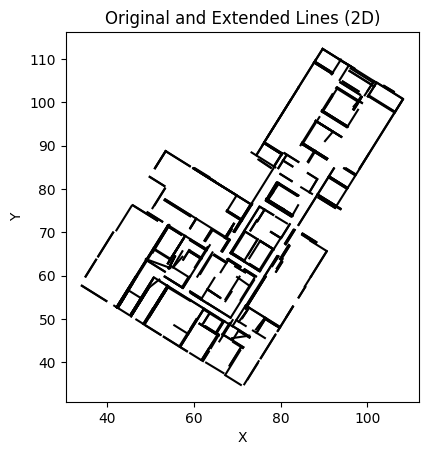

In [90]:
# Plot original and extended lines in 2D
plt.figure()

# Plot original lines
for line in linesetNodes:
    plt.plot([line.start[0], line.end[0]], [line.start[1], line.end[1]], 'k')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original and Extended Lines (2D)')

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [91]:
t_trim=0.3 #max distance to trim a wall
t_extend=0.7 #max distance to extend a wall

In [ ]:
t6.compute_potential_wall_connections(wallNodesBIM: List[Node], weight_intersection: float = 1, weight_orthogonal: float = 1, weight_direct: float = 1,
                                       t_intersection_extension: float = 0.25, t_ortho_extension: float = 0.25, t_direct_extension: float = 0.7)
